In [1]:
import numpy as np # 고성능의 수치계산을 위해 사용하는 라이브러리!
import pandas as pd # 읽어온 data를 정제하기 위한 라이브러리
import matplotlib.pyplot as plt # 시각화를 위한 라이브러리
import seaborn as sns # 시각화를 위한 라이브러리

In [2]:
drinks = pd.read_csv("drinks.csv")
drinks
# 총 193개의 로우 6개의 컬럼이 있다.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [3]:
drinks.info()
# continent의 23개가 NaN으로 지정된거를 볼 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [4]:
drinks.head()
# 나라의 알파벳 순으로 정렬이 되어 있다.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [5]:
drinks.describe()
# 숫자형으로 되어있는 컬럼들의 숫자에 대한 대략적인 내용을 보여준다.
# 평균 갯수 표준편차 최소값 최대값 등..

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [8]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [14]:
drinks.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [10]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'] # 상관관계도를 그리기 위해서 숫자형으로 되어 있는 컬럼만 모은다.

In [11]:
corr = drinks[cols].corr(method="pearson")
# 상관관계를 보기(상관관계에는 object 타입은 연결할 수 없다.)
# 그래서 사용할 컬럼만 데이터프레임에서 뽑아서 사용한다.

In [12]:
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [15]:
# 인사이트
# 1. 맥주의 소비량은 전체 주류 소비량에 84%정도 영향을 준다.
# 2. 증류주와 와인은 상관관계가 아주 낮다
# 3. 증류주는 와인보다는 맥주와 좀더 상관이 있다.
# 4. 맥주의 소비량은 증류주와 와인의 소비량과 어느정도는 관계가 있다.

In [16]:
# 항복간의 상관관계를 알 수 있는 방법3가지
# 1. corr함수를 이용(피어슨)
# 2. heatmap그래프 사용
# 3. pairplot 그래프 사용

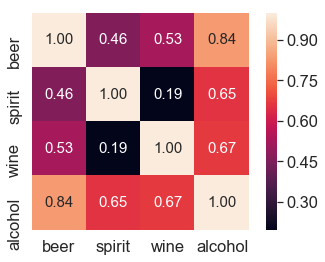

In [18]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5) # 글씨 크기
hm = sns.heatmap(corr.values,
            cbar=True, # 오른쪽 상관관계 바
            annot=True, # 각 상관관계 박스 위 글자
            square=True, # 정사각형
            fmt='.2f', # 소주점 2번째까지
            annot_kws={'size': 15}, # 상관관계 박스 위글씨크기
            yticklabels=cols_view,# x축
            xticklabels=cols_view) # y축

# plt.tight_layout()
plt.show()

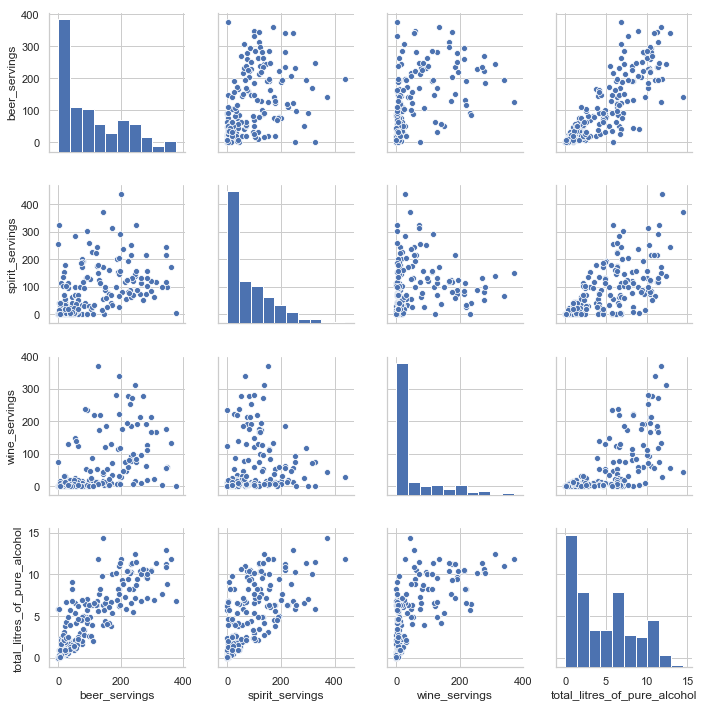

In [19]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings',
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()
# 페어플롯 그래프가 선형으로 이어져 잇는 경우가 상관관계가 있고 흩어져있을수록 상관관계가 아니다.

In [20]:
drinks.isnull()
# true, false로 리턴

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,True
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [21]:
drinks.isnull().sum()
# drinks.isnull()이 true인 값의 갯수를 더해봐라.
# continent만 true값을 가진다.

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [22]:
# NA: 결측치, not available 를 모두 NA처리를 함.
# NA로 모두 변경한것을 일괄처리할 수 있다.

In [24]:
drinks["continent"] = drinks["continent"].fillna("OT")
# fillna는 NA값을 변경해주는 replace의 역활과 동일하다 비파괴함수라서 변경된 값을 다시 데이터프레임에 넣어준다.
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


# 기술(설명)적 통계 : 통계를 통해서 데이터들을 자세하게 설명

In [25]:
drinks['continent'].value_counts()
# 각 대륙이 몇번 나왔는지 갯수를 카운트 해주는 함수.
# 그룹별 카운트

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [31]:
type(drinks['continent'].value_counts())
# 시리즈는 인덱스와 벨류의 결합이다.

pandas.core.series.Series

In [32]:
drinks['continent'].value_counts().index

Index(['AF', 'EU', 'AS', 'OT', 'OC', 'SA'], dtype='object')

In [33]:
pie_label = drinks['continent'].value_counts().index

In [34]:
drinks['continent'].value_counts().values
#시리즈는 인덱스와 벨류를 가진다.

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [35]:
pie_values = drinks['continent'].value_counts().values

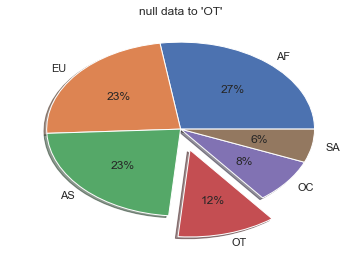

In [36]:
explode = (0, 0, 0, 0.25, 0, 0) # 그래프의 간격 옵션

plt.pie(pie_values, explode=explode, labels=pie_label, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [37]:
result = drinks.groupby("continent").spirit_servings.agg(["mean", "min", "max", "sum"])
# agg 함수는 그룹으로 묶은 애들의 숫자로된 수치를 한번에 데이터 프레임 형태로 만들어주는 함수이다.
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [38]:
type(result)

pandas.core.frame.DataFrame

In [39]:
result2 = drinks.groupby("continent").spirit_servings.mean()
result2

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [50]:
result3 = result2[result2.values >= 100] # 증류주의 평균 소비량이 100 이상인 값만 출력
result3

continent
EU    132.555556
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [52]:
result3.idxmax() # result3의 값중 가장 큰 값을 가지는 인덱스를 출력

'OT'

In [93]:
beer_result = drinks.groupby("continent").beer_servings.agg(["mean", "min", "max", "sum"])
beer_result # 대륙별 맥주소비량의 평균 최소 최대 총 합

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
OT,145.434783,1,285,3345
SA,175.083333,93,333,2101


In [94]:
beer_result["sum"]
# 대륙별 맥주 소비량 총합만 추출

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: sum, dtype: int64

In [95]:
beer_result["sum"].idxmax()
# 맥주소비량의 합이 가장큰 values를 가지는 index를 추출

'EU'

In [96]:
wine_result = drinks.groupby("continent").wine_servings.max()
wine_result
# 대륙별 와인 소비량의 최대값 추출

continent
AF    233
AS    123
EU    370
OC    212
OT    100
SA    221
Name: wine_servings, dtype: int64

In [97]:
wine_result.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [98]:
wine_result.values

array([233, 123, 370, 212, 100, 221], dtype=int64)

In [99]:
wine_result[wine_result.values == wine_result.values.max()]
# 와인 소비량의 최대값을 가지는 대륙과 총 최대 와인 소비량

continent
EU    370
Name: wine_servings, dtype: int64

In [100]:
# 맥주 평균(mean) 소비량이 제일 높은 대륙
beer_result2 = drinks.groupby("continent").beer_servings.mean()
beer_result2 # 대륙별 맥주소비량의 평균

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [101]:
beer_result2[beer_result2 == beer_result2.max()]
# 맥주소비량의 평균량이 가장 큰 대륙과 평균 소비량

continent
EU    193.777778
Name: beer_servings, dtype: float64

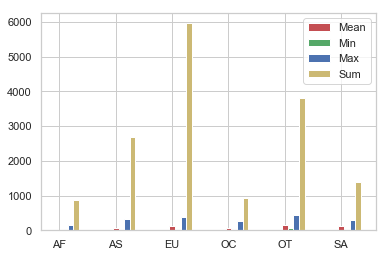

In [112]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result.index)
means = result['mean']
mins = result['min']
maxs = result['max']
sums = result['sum']
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend() # 범례 생성
plt.show()

In [113]:
wine_result2 = drinks.groupby("continent").wine_servings.agg(["mean", "min", "max", "sum"])
wine_result2
# 와인소비량의 수치통계

,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
OT,24.521739,1,100,564
SA,62.416667,1,221,749


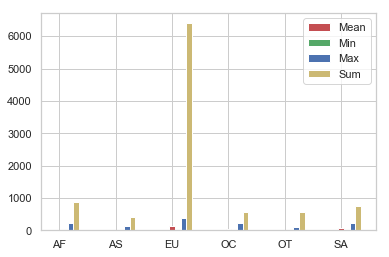

In [115]:
# 대륙별 wine_servings의 평균, 최소, 최대, 합계를 시각화합니다.
w_groups = len(wine_result2.index) # 0 ~ 5(대륙의 갯수의 길이)
means1 = wine_result2["mean"].tolist()
mins1 = wine_result2["min"].tolist()
maxs1 = wine_result2["max"].tolist()
sums1 = wine_result2["sum"].tolist()
 
index2 = np.arange(w_groups) # 0 ~ 5 까지의 인덱스를 만들어 준다.
bar_width = 0.1 # 각 그래프의 각격을 만들기 위함.
 
rects1 = plt.bar(index2, means1, bar_width,
                 color='r',
                 label='Mean')
# 와인소비량의 평균
rects2 = plt.bar(index2 + bar_width, mins1, bar_width,
                 color='g',
                 label='Min')
# 와인 소비량의 최소값
rects3 = plt.bar(index2 + bar_width * 2, maxs1, bar_width,
                 color='b',
                 label='Max')
# 와인 소비량의 최대값
rects3 = plt.bar(index2 + bar_width * 3, sums1, bar_width,
                 color='y',
                 label='Sum')
# 와인 소비량의 총합
plt.xticks(index2, result2.index.tolist())
plt.legend() # 범례 생성
plt.show()

In [116]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_mean = drinks.total_litres_of_pure_alcohol.mean()
# 총 소비량의 평균!
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 대륙별 총 알콜 소비량의 평균
continent_over_mean = continent_mean[continent_mean >= total_mean]
# 대륙별 알콜 소비량의 평균이 전체 알콜소비량의 평균보다 높은 대륙
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


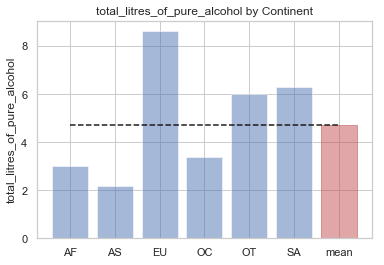

In [117]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다.
continents = continent_mean.index.tolist()
# 전체 대륙의 리스트를 만든다.
continents.append('mean')
# 전체 리스트의 평균값을 추가한다.
x_pos = np.arange(len(continents))
# 리스트의 길이 만큼 인덱스로 사용할 리스트를 만든다.
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [118]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [120]:
beer_total = drinks["beer_servings"]/drinks['total_litres_of_pure_alcohol']
# 나라별 전체알콜소비량 대비 맥주 소비량
beer_total

0            NaN
1      18.163265
2      35.714286
3      19.758065
4      36.779661
5      20.816327
6      23.253012
7       5.526316
8      25.096154
9      28.762887
10     16.153846
11     19.365079
12     21.000000
13           NaN
14     22.698413
15      9.861111
16     28.095238
17     38.676471
18     30.909091
19     57.500000
20     43.947368
21     16.521739
22     32.037037
23     34.027778
24     51.666667
25     22.427184
26      5.813953
27     13.968254
28      9.250000
29     36.000000
         ...    
163    22.857143
164    19.148936
165    21.111111
166    18.137255
167     5.000000
168     6.666667
169    15.468750
170    27.179487
171    10.000000
172    27.692308
173    32.727273
174    30.781250
175    39.230769
176    36.428571
177     8.636364
178     6.000000
179     5.421687
180    23.146067
181     5.714286
182    21.057692
183     6.315789
184    28.620690
185    17.424242
186    10.416667
187    23.333333
188    43.246753
189    55.500000
190    60.0000

In [122]:
drinks["beer_rate"] = beer_total
# 데이터프레임에 파생변수 하나 만들어서 넣기
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rate
0,Afghanistan,0,0,0,0.0,AS,NaN
1,Albania,89,132,54,4.9,EU,18.163265
2,Algeria,25,0,14,0.7,AF,35.714286
3,Andorra,245,138,312,12.4,EU,19.758065
4,Angola,217,57,45,5.9,AF,36.779661
5,Antigua & Barbuda,102,128,45,4.9,OT,20.816327
6,Argentina,193,25,221,8.3,SA,23.253012
7,Armenia,21,179,11,3.8,EU,5.526316
8,Australia,261,72,212,10.4,OC,25.096154
9,Austria,279,75,191,9.7,EU,28.762887


In [128]:
beer_rate2 = drinks["beer_servings"]/(drinks["beer_servings"] + drinks["wine_servings"] + drinks["spirit_servings"])
beer_rate2
# 3가지 술 소비량 대비 맥주소비량

0           NaN
1      0.323636
2      0.641026
3      0.352518
4      0.680251
5      0.370909
6      0.439636
7      0.099526
8      0.478899
9      0.511927
10     0.291667
11     0.349570
12     0.375000
13          NaN
14     0.406250
15     0.254937
16     0.499154
17     0.683117
18     0.666667
19     1.000000
20     0.773148
21     0.295720
22     0.711934
23     0.603448
24     0.911765
25     0.400347
26     0.641026
27     1.000000
28     0.822222
29     0.666667
         ...   
163    0.408946
164    0.957447
165    0.381910
166    0.327434
167    0.089286
168    0.117647
169    0.276536
170    0.484018
171    0.166667
172    0.631579
173    0.580645
174    0.547222
175    0.689189
176    0.637500
177    0.155738
178    0.107143
179    0.833333
180    0.422131
181    0.102564
182    0.405556
183    0.837209
184    0.507128
185    0.310811
186    0.186567
187    0.420000
188    0.763761
189    0.973684
190    1.000000
191    0.581818
192    0.744186
Length: 193, dtype: floa

In [123]:
drinks["wine_servings"].mean()
# 전체 와인 소비량의 평균!

49.45077720207254

In [124]:
drinks[drinks["wine_servings"] > drinks["wine_servings"].mean()].country
# 와인 소비량이 평균보다 많은 나라 출력

1                  Albania
3                  Andorra
6                Argentina
8                Australia
9                  Austria
11                 Bahamas
16                 Belgium
25                Bulgaria
32                  Canada
35                   Chile
40            Cook Islands
42                 Croatia
44                  Cyprus
45          Czech Republic
48                 Denmark
55       Equatorial Guinea
57                 Estonia
60                 Finland
61                  France
62                   Gabon
64                 Georgia
65                 Germany
67                  Greece
75                 Hungary
76                 Iceland
81                 Ireland
83                   Italy
92                    Laos
93                  Latvia
98               Lithuania
99              Luxembourg
105                  Malta
113             Montenegro
120            Netherlands
121            New Zealand
126                 Norway
132               Paraguay
1

In [129]:
drinks[drinks["wine_servings"] > drinks["wine_servings"].mean()].country.count()
# 평균 와인 소비량보다 많이 소비하는 나라의 수

55

In [131]:
drinks[drinks["wine_servings"] > drinks["wine_servings"].mean()].wine_servings.mean()
# 평균보다 와인을 많이 소비하는 나라의 와인 소비량의 평균

154.27272727272728

In [132]:
drinks[drinks["country"] == "South Korea"]
# 한국의 데이터 출력

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rate
138,South Korea,140,16,9,9.8,AS,14.285714


In [135]:
drinks[drinks["beer_servings"] > drinks["beer_servings"].mean()].country
# 맥주 평균보다 많이 소비하는 나라 출력

3                           Andorra
4                            Angola
6                         Argentina
8                         Australia
9                           Austria
11                          Bahamas
14                         Barbados
15                          Belarus
16                          Belgium
17                           Belize
20                          Bolivia
22                         Botswana
23                           Brazil
25                         Bulgaria
29                       Cabo Verde
31                         Cameroon
32                           Canada
35                            Chile
37                         Colombia
41                       Costa Rica
42                          Croatia
44                           Cyprus
45                   Czech Republic
48                          Denmark
51               Dominican Republic
52                          Ecuador
57                          Estonia
60                          

In [136]:
drinks[drinks["beer_servings"] > drinks["beer_servings"].mean()].country.count()

76

In [137]:
drinks[drinks["beer_servings"] > drinks["beer_servings"].mean()].beer_servings.mean()

215.47368421052633

In [141]:
beer_rank = drinks.sort_values("beer_servings", ascending=False)
beer_rank.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rate
117,Namibia,376,3,1,6.8,AF,55.294118
45,Czech Republic,361,170,134,11.8,EU,30.593220
62,Gabon,347,98,59,8.9,AF,38.988764
65,Germany,346,117,175,11.3,EU,30.619469
98,Lithuania,343,244,56,12.9,EU,26.589147
135,Poland,343,215,56,10.9,EU,31.467890
188,Venezuela,333,100,3,7.7,SA,43.246753
81,Ireland,313,118,165,11.4,EU,27.456140
129,Palau,306,63,23,6.9,OC,44.347826
140,Romania,297,122,167,10.4,EU,28.557692


In [154]:
beer_rank["rank"] = np.arange(len(drinks.index)) + 1
# rank 파생변수가 인덱스 형태의 0부터 시작하기 때문에 1을 더해서 순위를 적용해준다.
beer_rank.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rate,rank
117,Namibia,376,3,1,6.8,AF,55.294118,1
45,Czech Republic,361,170,134,11.8,EU,30.593220,2
62,Gabon,347,98,59,8.9,AF,38.988764,3
65,Germany,346,117,175,11.3,EU,30.619469,4
98,Lithuania,343,244,56,12.9,EU,26.589147,5
135,Poland,343,215,56,10.9,EU,31.467890,6
188,Venezuela,333,100,3,7.7,SA,43.246753,7
81,Ireland,313,118,165,11.4,EU,27.456140,8
129,Palau,306,63,23,6.9,OC,44.347826,9
140,Romania,297,122,167,10.4,EU,28.557692,10


In [155]:
beer_rank[beer_rank["country"] == "South Korea"]
# 한국은 66위

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rate,rank
138,South Korea,140,16,9,9.8,AS,14.285714,66


In [156]:
as_beer_rank = beer_rank[beer_rank["continent"] == "AS"]
# 아시아의 맥주소비량 순위를 찾아보자
as_beer_rank

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rate,rank
141,Russian Federation,247,326,73,11.5,AS,21.478261,23
138,South Korea,140,16,9,9.8,AS,14.285714,66
87,Kazakhstan,124,246,12,6.8,AS,18.235294,71
189,Vietnam,111,2,1,2.0,AS,55.500000,75
169,Thailand,99,258,1,6.4,AS,15.468750,80
36,China,79,192,8,5.0,AS,15.800000,91
85,Japan,77,202,16,7.0,AS,11.000000,93
112,Mongolia,77,189,8,4.9,AS,15.714286,94
134,Philippines,71,186,1,4.6,AS,15.434783,98
82,Israel,63,69,9,2.5,AS,25.200000,101


In [158]:
as_beer_rank["rank"] = np.arange(len(as_beer_rank)) + 1
as_beer_rank

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rate,rank
141,Russian Federation,247,326,73,11.5,AS,21.478261,1
138,South Korea,140,16,9,9.8,AS,14.285714,2
87,Kazakhstan,124,246,12,6.8,AS,18.235294,3
189,Vietnam,111,2,1,2.0,AS,55.500000,4
169,Thailand,99,258,1,6.4,AS,15.468750,5
36,China,79,192,8,5.0,AS,15.800000,6
85,Japan,77,202,16,7.0,AS,11.000000,7
112,Mongolia,77,189,8,4.9,AS,15.714286,8
134,Philippines,71,186,1,4.6,AS,15.434783,9
82,Israel,63,69,9,2.5,AS,25.200000,10


In [159]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: B046-9FAE

 C:\Users\user\Documents\drinks analysis 디렉터리

2021-05-04  오후 03:44    <DIR>          .
2021-05-04  오후 03:44    <DIR>          ..
2021-05-04  오전 10:07    <DIR>          .ipynb_checkpoints
2021-05-04  오전 10:05             4,973 drinks.csv
2021-05-04  오후 03:44           461,071 음주분석.ipynb
               2개 파일             466,044 바이트
               3개 디렉터리  147,917,983,744 바이트 남음


In [160]:
!pip install scipy
# 명령어를 쥬피터에서 사용할때 !로 사용할 수 있다.

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [161]:
africa = drinks.loc[drinks["continent"] == "AF"]
europe = drinks.loc[drinks["continent"] == "EU"]

In [164]:
from scipy import stats
# 설치된 라이브러리에서 stats를 임포트 시킨다.
# 통계 라이브러리 statistics

In [165]:
stats.ttest_ind(africa["beer_servings"], europe["beer_servings"])
# 아프리카의 맥주소비량, 유럽의 맥주소비량을 가지고 t-test를 해보는 과정
# p값이(0.0000000097) 이라서 아프리카와 유럽간의 평균이 차이가 있다.
# 대립가설이 채택이 된다.
# 대립가설: 아프리카, 유럽간 평균의 차이가 있다.
# 영가설: 아프리카, 유럽간 평균의 차이가 없다.
# pvalue의 값을 통해서 대립가설을 채택할지 버릴지를 결정할 수 있다.

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)